<a href="https://colab.research.google.com/github/Benjamindavid03/MachineLearningLab/blob/main/Dimensionality_Reduction_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction using PCA in Image Processing applications


In [199]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Loading the image 
image = cv2.imread("dog.png")  #you can use any image you want.
from google.colab.patches import cv2_imshow
print(image)
#viewing the original image
plt.axis("off")
plt.imshow(image)

In [218]:
blue,green,red =cv2.split(image)
#it will split the original image into Blue, Green and Red arrays.

In [219]:
#initialize PCA with first 20 principal components
pca = PCA(20)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [220]:
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

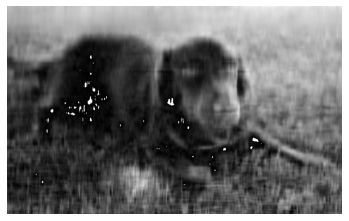

In [225]:
#viewing the compressed image
plt.axis("off")
plt.imshow(img_compressed)

# References
1. https://www.javatpoint.com/principal-component-analysis
2. https://www.askpython.com/python-modules/read-images-in-python-opencv
3. https://www.askpython.com/python/examples/principal-component-analysis-for-image-data
4. https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186
5. https://intellipaat.com/blog/a-brief-introduction-to-principal-component-analysis/
6. https://en.wikipedia.org/wiki/Principal_component_analysis
